
<a id='schelling'></a>
<div id="qe-notebook-header" style="text-align:right;">
        <a href="https://quantecon.org/" title="quantecon.org">
                <img style="width:250px;display:inline;" src="https://assets.quantecon.org/img/qe-menubar-logo.svg" alt="QuantEcon">
        </a>
</div>

# O Modelo de Segregação de Schelling


<a id='index-1'></a>

## Conteúdo
- [O Modelo de Segregação de Schelling](#O-Modelo-de-Segregação-de-Schelling)  
  - [Resumo](#Resumo)  
  - [O Modelo](#O-Modelo)  
  - [Resultados](#Resultados)  
  - [Exercícios](#Exercícios)  
  - [Soluções](#Soluções)  

> *Devidamente traduzido, revisado e adaptado do [QuantEcon](https://quantecon.org/) pelos bolsistas CNPq Pedro Luiz H. Furtado e Jonas Aragão M. Corpes, sob a supervisão do Prof. Christiano Penna, do CAEN/UFC.*

## Resumo

Em 1969, Thomas C. Schelling desenvolveu um simples mas impressionante modelo sobre segregação racial [Sch69](https://julia.quantecon.org/../zreferences.html#schelling1969).

Seu modelo estuda a dinâmica de bairros racialmente mistos.

Como grande parte do trabalho de Schelling, o modelo mostra como as interações locais podem levar a uma estrutura agregada surpreendente.

Em particular, mostra que a preferência relativamente moderada por vizinhos de raça semelhante pode levar, no agregado, ao colapso de bairros mistos e a altos níveis de segregação.

Em reconhecimento a essa e outras pesquisas, Schelling recebeu o Prêmio Nobel de 2005 de Ciências Econômicas (em conjunto com Robert Aumann).

Nesta aula, nós (de fato você) criaremos e executaremos uma versão do modelo de Schelling.

## O Modelo

Abordaremos uma variação do modelo de Schelling que é fácil de programar e captura a idéia principal.

Suponha que tenhamos dois tipos de pessoas: laranja e verde.

Para os fins desta aula, assumiremos que existem 250 de cada tipo.

Todos esses agentes vivem em um único quadrado de unidade.

A localização de um agente é apenas um ponto $ (x, y) $,  onde $ 0 < x, y < 1 $.

### Preferências

Digamos que um agente é *feliz* se metade ou mais de seus 10 vizinhos mais próximos forem do mesmo tipo.

Aqui ‘próximo’ em termos da [distância Euclidiana](https://en.wikipedia.org/wiki/Euclidean_distance).

O agente que não é feliz é chamado de *infeliz*.

Um ponto importante aqui é que os agentes não são avessos a viver em áreas mistas.

Eles ficam perfeitamente felizes se metade dos vizinhos for da outra cor.

### Comportamento

Inicialmente, os agentes são misturados juntos (integrados).

Em particular, a localização inicial de cada agente é um sorteio independente de uma distribuição uniforme bivariada em  $ S = (0, 1)^2 $.

Agora, percorrendo o conjunto de todos os agentes, cada agente agora tem a chance de permanecer ou se mover.

Assumimos que cada agente vai ficar como está se eles estão feliz e se moverão se estiverem infelizes.

O algoritmo para o agente se mover é o seguinte:

1. A extração sobre um local aleatório em $ S $  
1. Se estiver feliz em um novo local, vá para lá
1. Caso contrário, vá para o passo 1  


Dessa maneira, fazemos um ciclo contínuo entre os agentes, movendo-nos conforme necessário.

Continuamos no ciclo até que ninguém queira se mexer.

## Resultados

Vamos dar uma olhada nos resultados que obtivemos quando codificamos e executamos esse modelo.

Como discutido acima, os agentes são inicialmente misturados aleatoriamente

![1](https://github.com/pluiz30/Julia-Hub/assets/60633407/9b6e8876-4b73-41cb-8266-61dee47baa6f)

Mas depois de vários ciclos, eles segregam em regiões distintas:

![2](https://github.com/pluiz30/Julia-Hub/assets/60633407/fe8173c8-8f54-4b79-90cf-c7e7c74d13e6)

![3](https://github.com/pluiz30/Julia-Hub/assets/60633407/b0681871-118e-4983-8c5b-54217ebed4e5)

![4](https://github.com/pluiz30/Julia-Hub/assets/60633407/0b830807-7b26-4a66-b0f2-8f8df93d6c25)

  
Nessa instância, o programa foi encerrado após 4 ciclos pelo conjunto de agentes, indicando que todos os agentes haviam atingido um estado de felicidade.

O que chama a atenção nas fotos é a rapidez com que a integração racial se desintegra.

Isso apesar do fato de as pessoas no modelo não se importarem em viver misturadas com o outro tipo.

Mesmo com essas preferências, o resultado é um alto grau de segregação.

## Exercícios


<a id='schelling-ex1'></a>

### Exercício 1

Implemente e execute essa simulação por sí mesmo.

Use 250 agentes de cada tipo.

## Soluções

### Exercício 1

Aqui está uma solução que faz o trabalho que queremos. Se você tentar como um exercício adicional, provavelmente poderá acelerar alguns cálculos e aumentar o número de agentes.

### Configuração

In [1]:
using InstantiateFromURL
github_project("QuantEcon/quantecon-notebooks-julia", version = "0.5.0")
# github_project("QuantEcon/quantecon-notebooks-julia", version = "0.5.0", instantiate = true) # uncomment to force package installation

In [2]:
using Parameters, Plots, LinearAlgebra, Statistics
gr(fmt = :png);

In [3]:
Agent = @with_kw (kind, location = rand(2))

draw_location!(a) = a.location .= rand(2)

# a distância é apenas 2 norm: use nossa função de subtração
get_distance(a, agent) = norm(a.location - agent.location)

function is_happy(a)
    distances = [(get_distance(a, agent), agent) for agent in agents]
    sort!(distances)
    neighbors = [agent for (d, agent) in distances[1:neighborhood_size]]
    share = mean(isequal(a.kind), other.kind for other in neighbors)

    # podemos também fazer
    # share = mean(isequal(a.kind),
    #              first(agents[idx]) for idx in
    #              partialsortperm(get_distance.(Ref(a), agents),
    #                              1:neighborhood_size))

    return share ≥ preference
end

function update!(a)
    # Se não estiver feliz, escolha aleatoriamente novos locais até ficar feliz.
    while !is_happy(a)
        draw_location!(a)
    end
end

function plot_distribution(agents)
    x_vals_0, y_vals_0 = zeros(0), zeros(0)
    x_vals_1, y_vals_1 = zeros(0), zeros(0)

    # obtém locais de cada tipo 
    for agent in agents
        x, y = agent.location
        if agent.kind == 0
            push!(x_vals_0, x)
            push!(y_vals_0, y)
        else
            push!(x_vals_1, x)
            push!(y_vals_1, y)
        end
    end

    p = scatter(x_vals_0, y_vals_0, color = :orange, markersize = 8, alpha = 0.6)
    scatter!(x_vals_1, y_vals_1, color = :green, markersize = 8, alpha = 0.6)
    return plot!(legend = :none)
end

plot_distribution (generic function with 1 method)

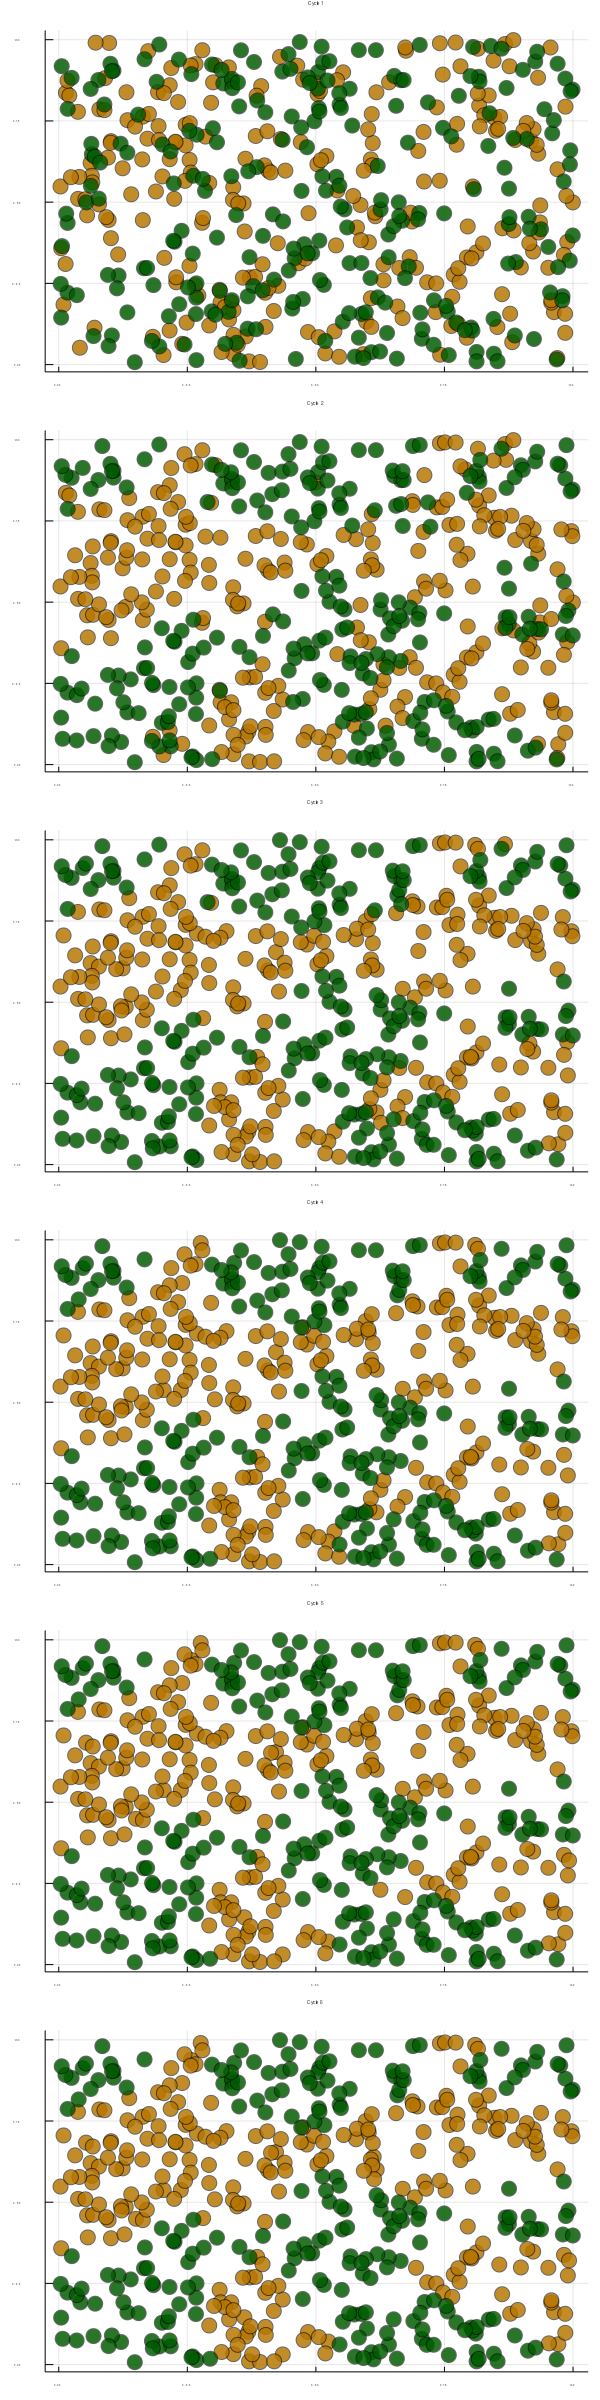

In [4]:
num_of_type_0 = 250
num_of_type_1 = 250
neighborhood_size = 10 # Número de agentes considerados como vizinhos 
preference = 0.5 #  Deseja que seu tipo faça pelo menos essa parte do bairro 

# Cria uma lista de agentes
agents = vcat([Agent(kind = 0) for i in 1:num_of_type_0],
              [Agent(kind = 1) for i in 1:num_of_type_1])

plot_array = Any[]

# Fazendo o loop até ninguém se mover
while true
    push!(plot_array, plot_distribution(agents))
    no_one_moved = true
    for agent in agents
        old_location = copy(agent.location)
        update!(agent)
        if norm(old_location - agent.location) ≉ 0
            no_one_moved = false
        end
    end
    if no_one_moved
        break
    end
end
n = length(plot_array)
plot(plot_array...,
     layout = (n, 1),
     size = (600, 400n),
     title = reshape(["Cycle $i" for i in 1:n], 1, n))